<a href="https://colab.research.google.com/github/nickwan/nfl-qb-td-tutorial/blob/main/nfl_ml_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NFL Analytics 101 
Lots of basics and principles here are used in _real_ analytics departments by analysts, scientists, engineers, coaches, directors, and everyone in between. Some things you'll want to know before 

get the data from 
`https://github.com/nflverse/nflverse-data/releases/tag/pbp` 

## Load necessary packages 

In [2]:
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

## Loading data 
* Set file path 
* Load in CSV (2019, 2020, 2021)  

In [8]:
# Set a path to your google drive 
# "drive/My Drive" will access your parent 
# gdrive directory  

# my data is stored in "nflfastR-data"
project_dir = "drive/My Drive/nflfastR-data"

# You can explore the different folders using 
# `os.listdir()`
szn_folders = os.listdir(f"{project_dir}/data/pbp")
print(szn_folders)

['season=1999', 'season=2000', 'season=2001', 'season=2002', 'season=2003', 'season=2004', 'season=2005', 'season=2006', 'season=2007', 'season=2008', 'season=2009', 'season=2010', 'season=2011', 'season=2012', 'season=2013', 'season=2014', 'season=2015', 'season=2016', 'season=2017', 'season=2018', 'season=2019', 'season=2020', 'season=2021']


In [9]:
# You'll notice the folder names are different 
# NFL seasons. We can investigate what's in each 
# with the same `os.listdir()` function  
in_dir = os.listdir(f"{project_dir}/data/pbp/{szn_folders[0]}")
print(in_dir)

['play_by_play_1999.csv']


In [24]:
# Within each season folder is a play-by-play CSV
# We'll need this to create our ML model 
# Let's just take seasons 2019-2021:  
target_seasons = [x for x in szn_folders 
                  if ('2019' in x) | 
                  ('2020' in x) | 
                  ('2021' in x)]

# This list comprehension navigates to the season 
# folder and selects the play-by-play filename and 
# appends it to a full path name
data_files = ([f"""{project_dir}/data/pbp/{data_folder}/{os.listdir(f"{project_dir}/data/pbp/{data_folder}")[0]}""" 
               for data_folder in target_seasons])

print(data_files)

['drive/My Drive/nflfastR-data/data/pbp/season=2019/play_by_play_2019.csv',
 'drive/My Drive/nflfastR-data/data/pbp/season=2020/play_by_play_2020.csv',
 'drive/My Drive/nflfastR-data/data/pbp/season=2021/play_by_play_2021.csv']

In [26]:
# We can open these data with pandas in a for loop

# initialize a dataframe to append data into
df = pd.DataFrame()

# loop through your filenames, open them, 
# and append them to the df 
for fn in data_files: 
  df = df.append(pd.read_csv(fn))

# reset the index; each CSV comes in with its own
# index which causes duplicate indicies in a load
# like this 
df = df.reset_index(drop=True)  

# print the size of the dataframe
print(df.shape)

(147260, 372)


In [27]:
# show the top 10 results
df.head(10)

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
0,1,2019_01_ATL_MIN,2019090804,MIN,ATL,REG,1,NaN,NaN,NaN,...,0,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,36,2019_01_ATL_MIN,2019090804,MIN,ATL,REG,1,ATL,away,MIN,...,0,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,51,2019_01_ATL_MIN,2019090804,MIN,ATL,REG,1,ATL,away,MIN,...,0,0,-1.658763,NaN,NaN,NaN,NaN,NaN,0.486799,51.320082
3,79,2019_01_ATL_MIN,2019090804,MIN,ATL,REG,1,ATL,away,MIN,...,0,0,-0.538914,NaN,NaN,NaN,NaN,NaN,0.639994,-63.999379
4,100,2019_01_ATL_MIN,2019090804,MIN,ATL,REG,1,ATL,away,MIN,...,0,0,0.142138,NaN,NaN,NaN,NaN,NaN,0.933516,6.648362
5,121,2019_01_ATL_MIN,2019090804,MIN,ATL,REG,1,ATL,away,MIN,...,0,0,-4.034299,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,148,2019_01_ATL_MIN,2019090804,MIN,ATL,REG,1,MIN,home,ATL,...,1,0,-1.125093,NaN,NaN,NaN,NaN,NaN,0.408242,-40.824211
7,185,2019_01_ATL_MIN,2019090804,MIN,ATL,REG,1,MIN,home,ATL,...,1,0,0.258130,0.747668,6.732305,6.0,0.505931,0.053389,0.705088,29.491204
8,214,2019_01_ATL_MIN,2019090804,MIN,ATL,REG,1,MIN,home,ATL,...,0,0,2.785377,0.304460,2.208216,0.0,0.999368,0.484263,0.803992,19.600838
9,239,2019_01_ATL_MIN,2019090804,MIN,ATL,REG,1,MIN,home,ATL,...,0,0,0.051172,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# show a random sample of 5 rows 
df.sample(5)

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
146803,1688,2021_21_CIN_KC,2022013000,KC,CIN,POST,21,KC,home,CIN,...,1,0,1.555554,0.575911,7.079263,3.0,1.000000,1.000000,0.697228,30.277205
44675,362,2019_17_NO_CAR,2019122902,CAR,NO,REG,17,NO,away,CAR,...,0,0,-0.572256,0.272484,4.034550,1.0,1.000000,1.000000,0.477024,52.297574
94912,3858,2020_18_IND_BUF,2021010900,BUF,IND,POST,18,BUF,home,IND,...,0,0,-0.445150,0.644178,7.070769,6.0,0.525194,0.233746,0.217288,78.271174
24057,3996,2019_09_TEN_CAR,2019110302,CAR,TEN,REG,9,TEN,away,CAR,...,0,1,0.122081,0.580391,3.061358,2.0,0.998492,0.998492,0.933123,6.687659
13677,3300,2019_05_NE_WAS,2019100609,WAS,NE,REG,5,NE,away,WAS,...,0,1,-0.841476,0.280108,4.555020,2.0,0.999485,0.999485,0.423768,57.623199


In [29]:
# list all columns in the dataframe 
df.columns.values

array(['play_id', 'game_id', 'old_game_id', 'home_team', 'away_team',
       'season_type', 'week', 'posteam', 'posteam_type', 'defteam',
       'side_of_field', 'yardline_100', 'game_date',
       'quarter_seconds_remaining', 'half_seconds_remaining',
       'game_seconds_remaining', 'game_half', 'quarter_end', 'drive',
       'sp', 'qtr', 'down', 'goal_to_go', 'time', 'yrdln', 'ydstogo',
       'ydsnet', 'desc', 'play_type', 'yards_gained', 'shotgun',
       'no_huddle', 'qb_dropback', 'qb_kneel', 'qb_spike', 'qb_scramble',
       'pass_length', 'pass_location', 'air_yards', 'yards_after_catch',
       'run_location', 'run_gap', 'field_goal_result', 'kick_distance',
       'extra_point_result', 'two_point_conv_result',
       'home_timeouts_remaining', 'away_timeouts_remaining', 'timeout',
       'timeout_team', 'td_team', 'td_player_name', 'td_player_id',
       'posteam_timeouts_remaining', 'defteam_timeouts_remaining',
       'total_home_score', 'total_away_score', 'posteam_score'

# Explore features 
* What correlates with touchdowns?  
* Use yards and previous season performance to predict touchdowns?  

In [33]:
# Although this dataset has a lot of different
# features, you most likely don't need to use
# all of them to create your first predictive 
# model. We should start simple with things that
# correlate with quarterback touchdowns 

# Let's take some basic quarterback stats 
qb_feats = ['season', 'passer_id', 'passer', 'pass', 
            'complete_pass', 'interception', 
            'sack', 'yards_gained', 'touchdown']

# Let's group by season and who the passer was 
groupby_feats = ['season', 'passer_id', 'passer'] 

# group by and aggregate by sum 
qb_df = (df
         .loc[:, qb_feats]
         .groupby(groupby_feats, 
                  as_index=False)
         .sum())

# random sample of 10 player-seasons 
qb_df.sample(10)

,season,passer_id,passer,pass,complete_pass,interception,sack,yards_gained,touchdown
40,2019,00-0030520,M.Glennon,10,6.0,0.0,0.0,56.0,1.0
328,2021,00-0035689,D.Knox,1,0.0,0.0,0.0,2.0,0.0
325,2021,00-0035544,T.Kennedy,1,1.0,0.0,0.0,75.0,1.0
191,2020,00-0034418,C.Wilson,2,2.0,0.0,0.0,23.0,1.0
176,2020,00-0033319,N.Mullens,364,211.0,12.0,19.0,2310.0,15.0
148,2020,00-0030533,M.Barkley,22,11.0,1.0,1.0,190.0,1.0
46,2019,00-0031076,D.Fales,1,0.0,0.0,1.0,-7.0,0.0
215,2020,00-0035710,D.Jones,549,280.0,10.0,45.0,2833.0,12.0
6,2019,00-0022924,B.Roethlisberger,74,35.0,1.0,2.0,351.0,0.0
339,2021,00-0036226,J.Eason,5,2.0,1.0,0.0,25.0,0.0


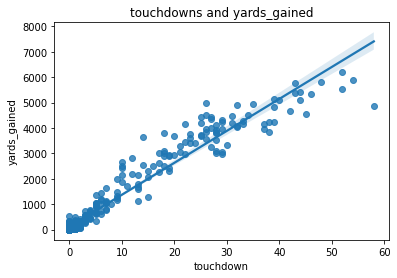

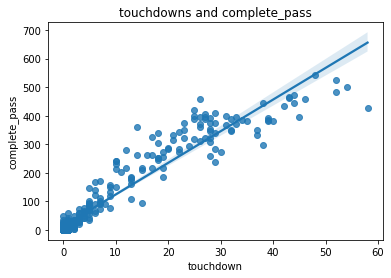

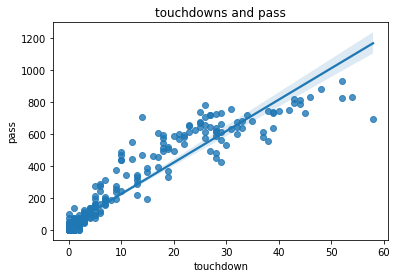

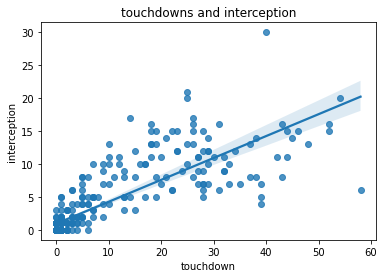

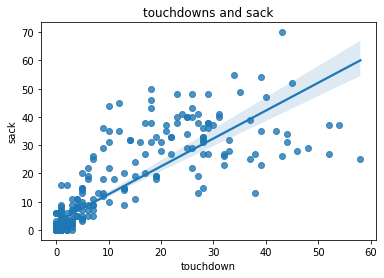

In [37]:
# let's see what correlates with touchdowns 
for y in ['yards_gained', 'complete_pass', 
          'pass', 'interception','sack']:
  sns.regplot(data=qb_df, x='touchdown', y=y)
  plt.title(f"touchdowns and {y}")
  plt.show()


In [40]:
# Apparently knowing yards gained, 
# completed passes, attempted passes, 
# interceptions, and sacks all correlate with
# touchdowns. Let's see if this is the case for
# _next season_ touchdowns 

# make a copy of the qb dataframe 
_df = qb_df.copy()

# add 1 to season
_df['season'] = _df['season'].add(1)

# merge this back on the original qb dataframe
# specify "on=[]" so we only join on specific 
# columns; specify "suffixes=()" so the duplicate
# column names get a suffix appended to them; 
# specify "how='left'" so this is a left join 
new_qb_df = (qb_df
             .merge(_df, 
                    on=['season', 'passer_id', 'passer'], 
                    suffixes=('', '_prev'), 
                    how='left'))

new_qb_df.sample(10)

,season,passer_id,passer,pass,complete_pass,interception,sack,yards_gained,touchdown,pass_prev,complete_pass_prev,interception_prev,sack_prev,yards_gained_prev,touchdown_prev
30,2019,00-0029263,R.Wilson,735,380.0,5.0,54.0,4818.0,39.0,NaN,NaN,NaN,NaN,NaN,NaN
102,2019,00-0035251,W.Grier,64,28.0,4.0,6.0,206.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
166,2020,00-0032543,A.Erickson,1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,26.0,0.0
228,2020,00-0036384,B.DiNucci,51,23.0,0.0,7.0,155.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
114,2020,00-0022924,B.Roethlisberger,743,446.0,14.0,13.0,4213.0,38.0,74.0,35.0,1.0,2.0,351.0,0.0
146,2020,00-0030506,T.Kelce,2,1.0,0.0,0.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
285,2021,00-0033009,T.Boyd,1,1.0,0.0,0.0,46.0,0.0,2.0,1.0,0.0,0.0,16.0,0.0
49,2019,00-0031280,D.Carr,576,361.0,8.0,29.0,3947.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN
182,2020,00-0033869,M.Trubisky,372,218.0,8.0,19.0,2299.0,19.0,607.0,326.0,10.0,38.0,3027.0,17.0
254,2021,00-0029604,K.Cousins,635,372.0,7.0,28.0,4148.0,33.0,610.0,349.0,13.0,39.0,4157.0,37.0


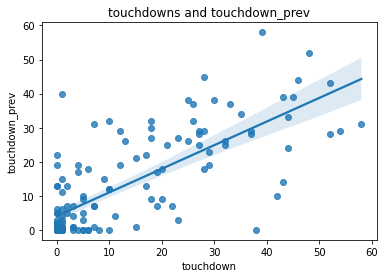

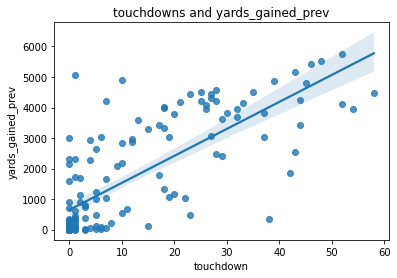

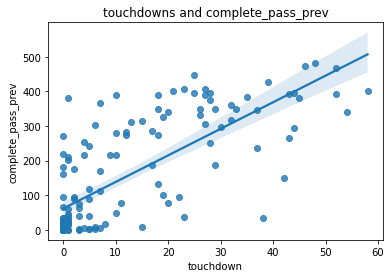

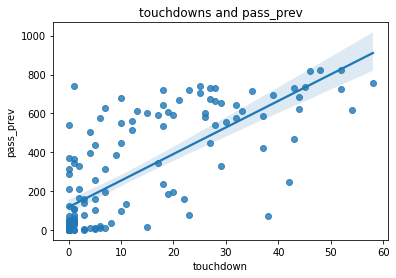

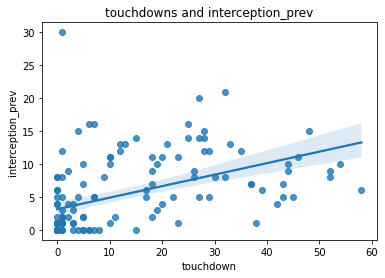

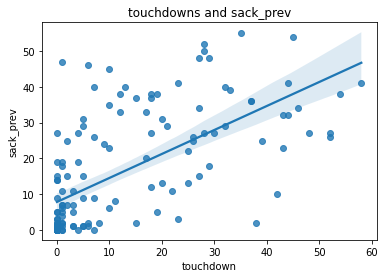

In [41]:
# let's see what correlates with 
# next season touchdowns 
for y in ['touchdown_prev','yards_gained_prev', 
          'complete_pass_prev', 'pass_prev', 
          'interception_prev','sack_prev']:
  sns.regplot(data=new_qb_df, x='touchdown', y=y)
  plt.title(f"touchdowns and {y}")
  plt.show()


In [ ]:
# Using previous season information, we can see 
# there are year-to-year correlations with
# touchdowns. Let's use previous season performance
# to estimate touchdowns thrown for the next season

## Machine learning 
* Simple linear model 
* Train with the previous year, test on next year 
* Save out-of-sample test results 
* Visualize and run basic stats 

In [42]:
# Let's load in machine learning and stats packages
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

In [46]:
new_qb_df.sample(10)

,season,passer_id,passer,pass,complete_pass,interception,sack,yards_gained,touchdown,pass_prev,complete_pass_prev,interception_prev,sack_prev,yards_gained_prev,touchdown_prev
329,2021,00-0035704,D.Lock,137,67.0,2.0,9.0,783.0,4.0,507.0,254.0,15.0,19.0,2942.0,19.0
344,2021,00-0036389,J.Hurts,587,288.0,11.0,28.0,3668.0,20.0,196.0,77.0,4.0,13.0,1167.0,9.0
339,2021,00-0036226,J.Eason,5,2.0,1.0,0.0,25.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
319,2021,00-0034955,B.Rypien,2,0.0,0.0,0.0,0.0,0.0,49.0,27.0,4.0,1.0,295.0,3.0
172,2020,00-0033106,J.Goff,670,400.0,13.0,29.0,4193.0,25.0,704.0,394.0,16.0,22.0,4506.0,26.0
6,2019,00-0022924,B.Roethlisberger,74,35.0,1.0,2.0,351.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
284,2021,00-0032950,C.Wentz,620,322.0,7.0,32.0,3525.0,28.0,543.0,251.0,15.0,50.0,2489.0,18.0
171,2020,00-0033077,D.Prescott,246,151.0,4.0,10.0,1856.0,10.0,678.0,388.0,11.0,23.0,4899.0,32.0
26,2019,00-0028064,B.Powell,1,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
122,2020,00-0026158,J.Flacco,160,74.0,3.0,7.0,817.0,7.0,313.0,171.0,5.0,26.0,1651.0,7.0


In [47]:
# We will "train" our data on one season and "test"
# on the next season. If you are unfamiliar with
# the concept of train test splitting, I suggest 
# codebasics tutorial https://www.youtube.com/watch?v=fwY9Qv96DJY

# Let's use the previous season performance as
# our features for our model 
features = ['pass_prev', 'complete_pass_prev', 
            'interception_prev', 'sack_prev',
            'yards_gained_prev', 'touchdown_prev']

# We are predicting "current" season touchdowns 
target = 'touchdown' 

# Let's make a subset of data that has 
# no null values
model_data = (new_qb_df
              .dropna(subset=features+[target]))

# train on 2020 data  
train_data = (model_data
              .loc[model_data['season']==2020])

# test on 2021 data (data the model hasn't seen)
test_data = (model_data
             .loc[model_data['season']==2021])

# initialize the linear regression
model = LinearRegression()

# fit, or "train", the model on the training data
model.fit(train_data.loc[:, features], 
          train_data[target])

# predict on the test data 
preds = model.predict(test_data.loc[:, features])

# don't forget to set an index so your 
# predictions match the correct rows
preds = pd.Series(preds, index=test_data.index)

# join your predictions back to your test dataset
test_data['preds'] = preds

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [50]:
# Let's run some basic statistics to examine the
# quality of the prediction

rmse = mean_squared_error(test_data['touchdown'], test_data['preds'])**0.5
r2 = pearsonr(test_data['touchdown'], test_data['preds'])[0]**2
print(f"rmse: {rmse}\nr2: {r2}")

rmse: 8.35017418714839
r2: 0.7012986698279877


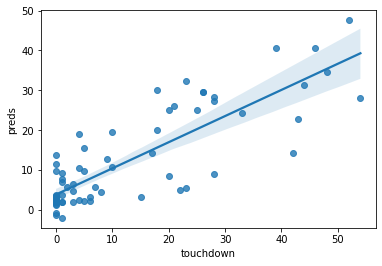

In [49]:
# Let's visualize the outputs 
sns.regplot(data=test_data, x='touchdown', y='preds')
plt.title('touchdown and predictions')
plt.show()

In [53]:
test_data.loc[:, ['season', 'passer_id', 'passer', 'touchdown', 'preds']].sort_values('touchdown', ascending=False).head(10)

,season,passer_id,passer,touchdown,preds
242,2021,00-0026498,M.Stafford,54.0,27.965671
299,2021,00-0033873,P.Mahomes,52.0,47.579060
231,2021,00-0019596,T.Brady,48.0,34.452599
315,2021,00-0034857,J.Allen,46.0,40.540951
343,2021,00-0036355,J.Herbert,44.0,31.218028
345,2021,00-0036442,J.Burrow,43.0,22.849041
287,2021,00-0033077,D.Prescott,42.0,14.211800
234,2021,00-0023459,A.Rodgers,39.0,40.719222
254,2021,00-0029604,K.Cousins,33.0,24.272175
252,2021,00-0029263,R.Wilson,28.0,28.311313
